In [2]:
# necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# setting layout
sns.set(rc = {'figure.figsize':(15, 15)})
sns.set(color_codes = True)

In [4]:
# loading data
heart = pd.read_csv('./kaggle/heart.csv')

In [5]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
heart.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [7]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
heart.target

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [10]:
heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [11]:
# just warmup
rn = np.random.RandomState(0)

In [12]:
X = np.linspace(0, 10, 100)
y = np.cumsum(rn.randn(100, 5),0) # Cummulative Sum

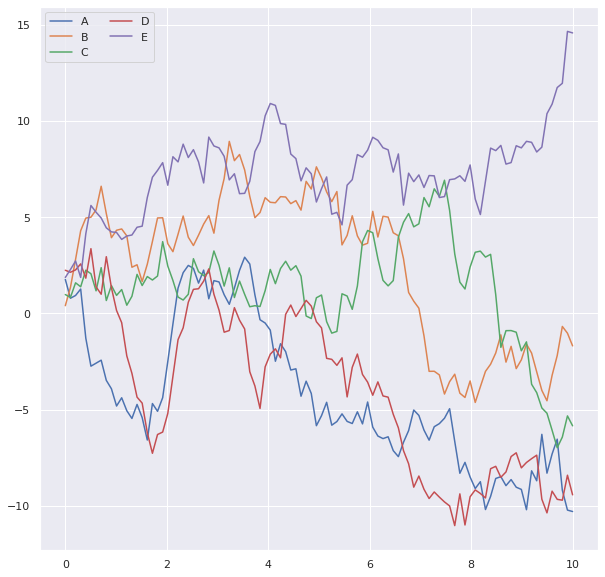

In [13]:
plt.plot(X, y)
plt.legend(labels ='ABCDE', ncol = 2, loc = 'upper left' )

Text(0, 0.5, 'Resting Blood Pressures')

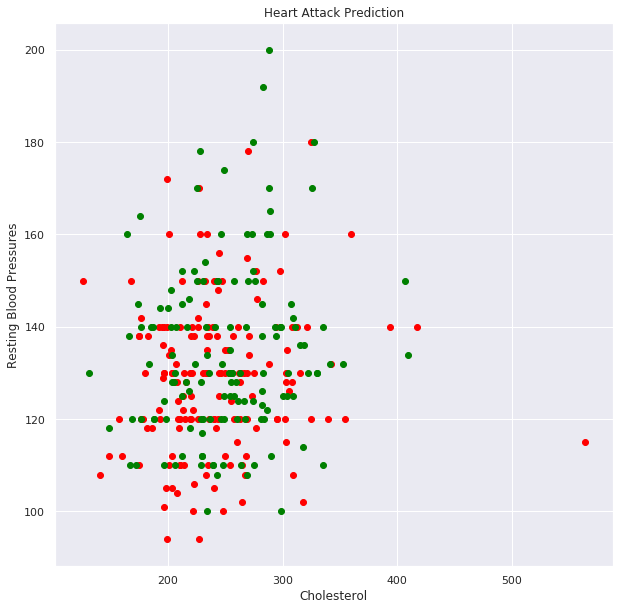

In [14]:
Outcome_clr = {0:'green',1:'red'}
fig, ax = plt.subplots()

for i in range(len(heart['age'])):
    ax.scatter( heart['chol'][i] , heart['trestbps'][i], color = Outcome_clr[heart['target'][i]])
    
ax.set_title('Heart Attack Prediction')
ax.set_xlabel('Cholesterol')
ax.set_ylabel('Resting Blood Pressures')

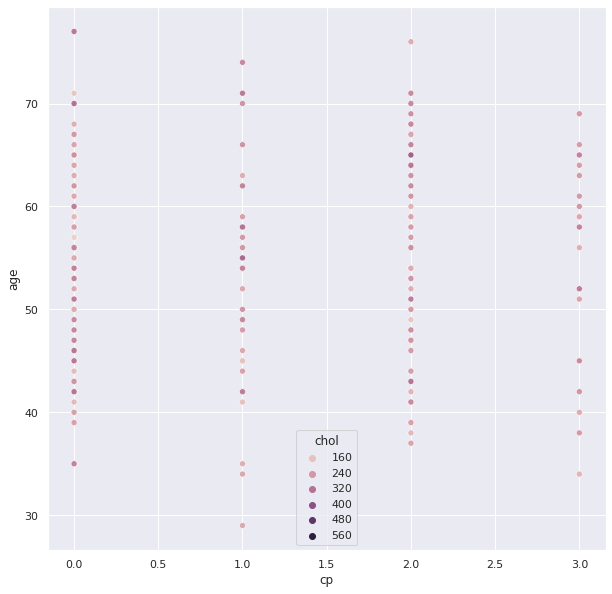

In [15]:
sns.scatterplot(x=heart['cp'], y=heart['age'], hue=heart['chol'], data=heart, sizes=(20,200))

In [16]:
factors = heart.drop(['age','sex', 'target','thal','slope'], axis=1)

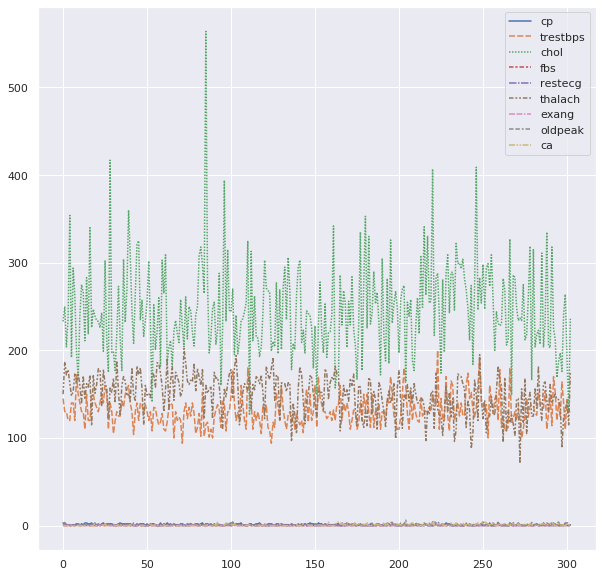

In [17]:
sns.lineplot(data=factors)

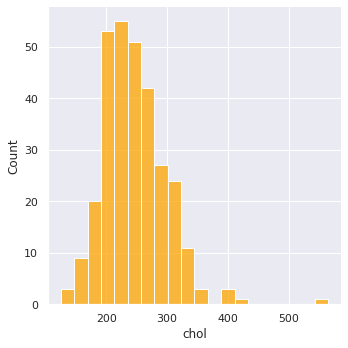

In [18]:
sns.displot(heart['chol'], bins=20, kde=False, color='orange')

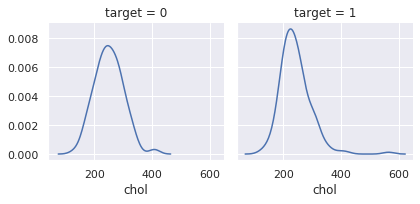

In [19]:
s = sns.FacetGrid(heart, col='target') # 0 = not a heart attack, 1 = heart attack
s.map(sns.kdeplot, 'chol') 

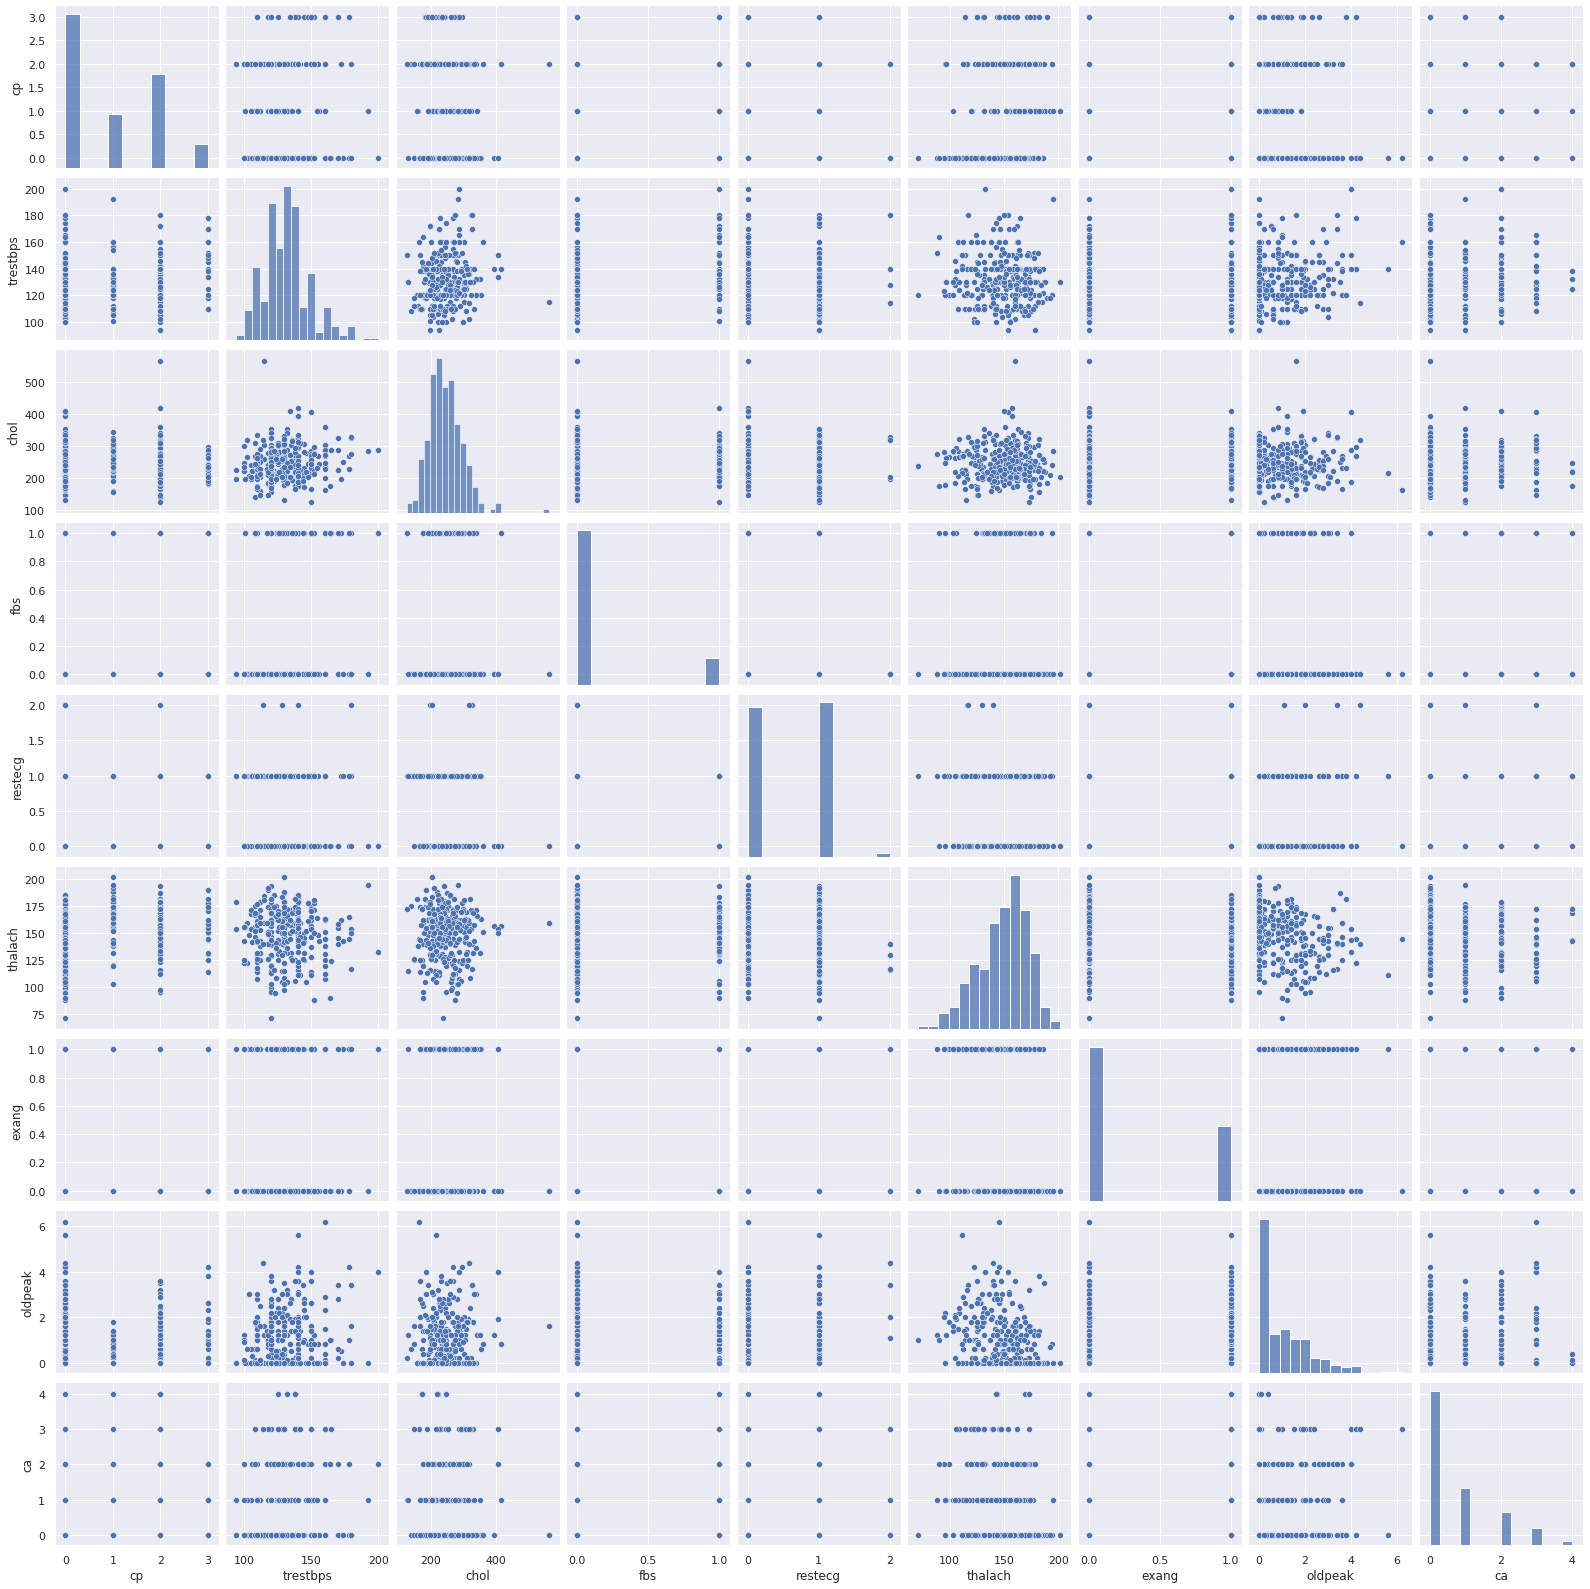

In [20]:
sns.pairplot(factors)

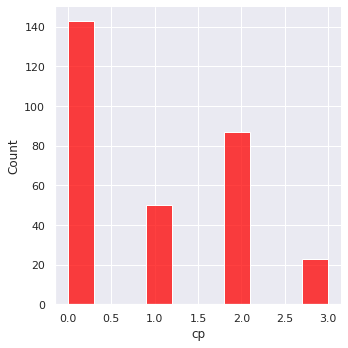

In [21]:
sns.displot(heart['cp'], kde=False, color='red') #there are 4 types of chest pains 
#observing how many of the dataset felt the same pain while through heart attack

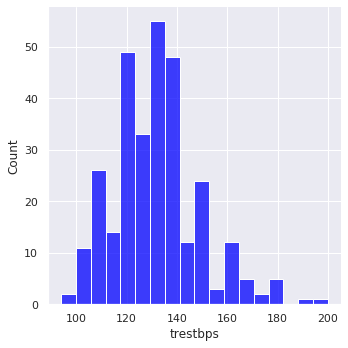

In [23]:
sns.displot(heart['trestbps'], kde=False, color='blue')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


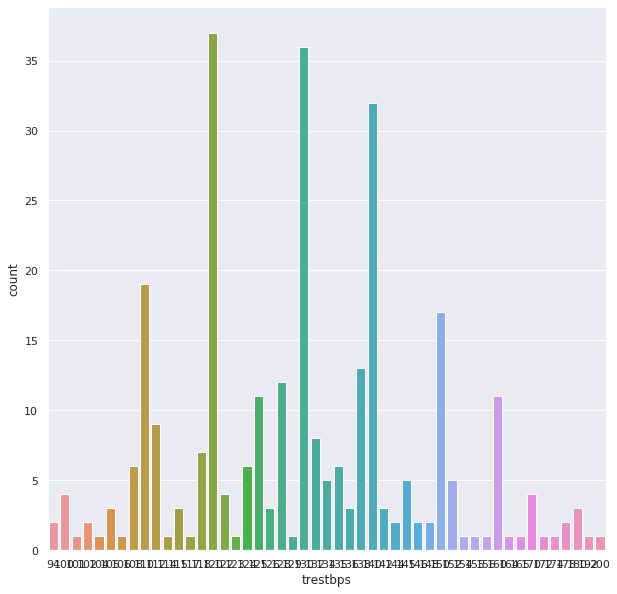

In [25]:
sns.countplot(heart['trestbps'])

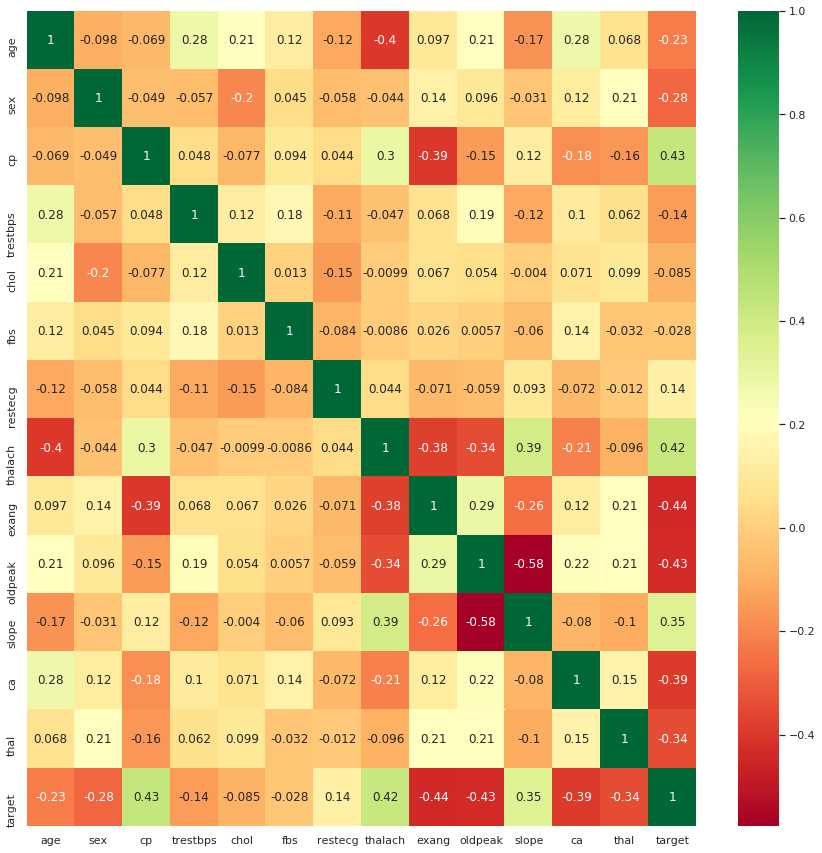

In [29]:
# correlation matrix sns heatmap
heart_corr = heart.corr()
sns.heatmap(heart_corr, annot=True, cmap='RdYlGn')